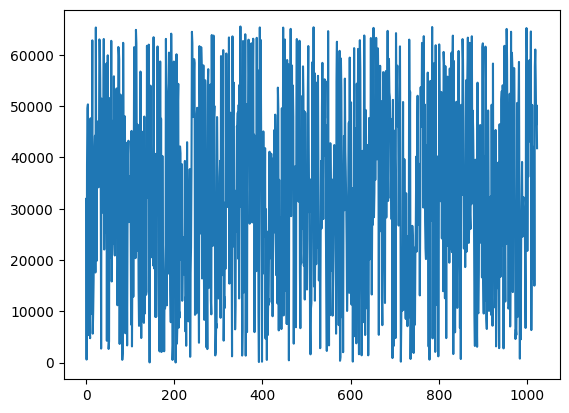

In [20]:
import random
import matplotlib.pyplot as plt
import numpy as np

STEP = 1024
MAX_VALUE = 2**16-1

random_array = []
for i in range(STEP):
    random_array.append(random.randint(0,MAX_VALUE))

x = np.arange(STEP)
plt.plot(x, random_array)
plt.show()

with open("output/raw_data.txt", mode="w", encoding="utf-8", newline="\n") as f:
    for i in random_array:
        f.write("{:04X}".format(i) + "\n")

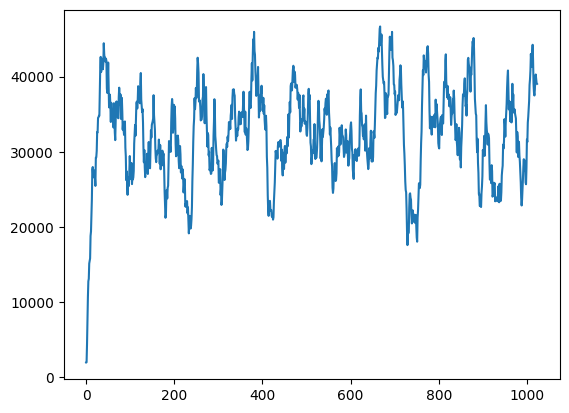

In [21]:
TAPS = 128

sum = 0
ave = 0
ave_array = []

for i in range(len(random_array)):
    sum = sum + random_array[i]
    if i >= TAPS:
        sum = sum - random_array[i - TAPS]
    ave = sum // TAPS
    if i >= TAPS:
        ave_array.append(ave)

x = np.arange(len(ave_array))
plt.plot(x, ave_array)
plt.show()

with open("output/ave_data.txt", mode="w", encoding="utf-8", newline="\n") as f:
    for i in ave_array:
        f.write("{:04X}".format(i) + "\n")

<Axes: >

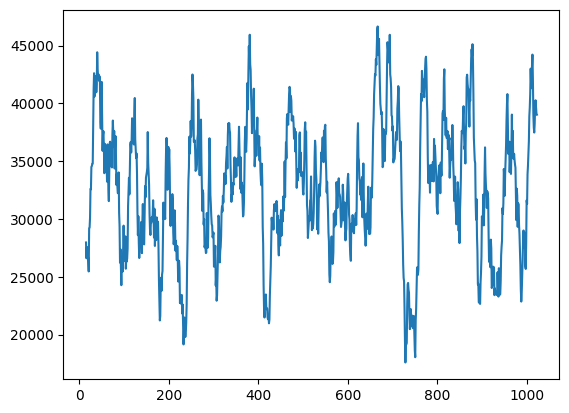

In [22]:
import pandas as pd

df = pd.Series(random_array)
ave = df.rolling(TAPS).mean()
ave.plot()